In [40]:
import pyro.distributions as distro
import seaborn as sns
import matplotlib.pyplot as plt
import torch

## Excersise 1

In [41]:
# define parameters
n = 30
p = 0.5

In [ ]:
binomial = lambda x

/home/macro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/macro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


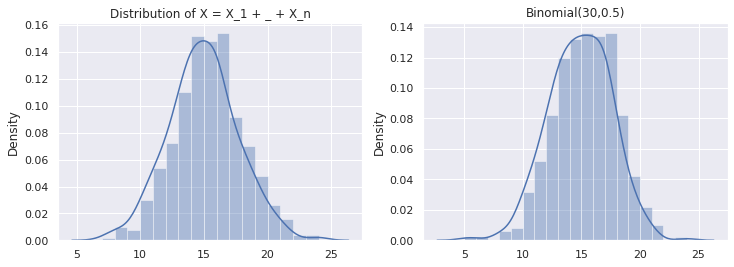

In [95]:
# sample variable X from lemma 
X_sample = [sum([pyro.sample("b",distro.Bernoulli(0.5)) for __ in range(n)]) for _ in range(500)]

# sample binomial (30,0.5)
binomial = distro.Binomial(n, p)
binomial_sample = binomial.sample((500,))

# plotting
fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.distplot(X_sample, ax = axes[0])
sns.distplot(binomial_sample, ax = axes[1])
axes[0].set_title('Distribution of X = X_1 + _ + X_n')
axes[1].set_title('Binomial(30,0.5)')
plt.show()

## Exercise 2

### 2.2

In [96]:
# define parameters 
alpha = 1
beta = 2

/home/macro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/macro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


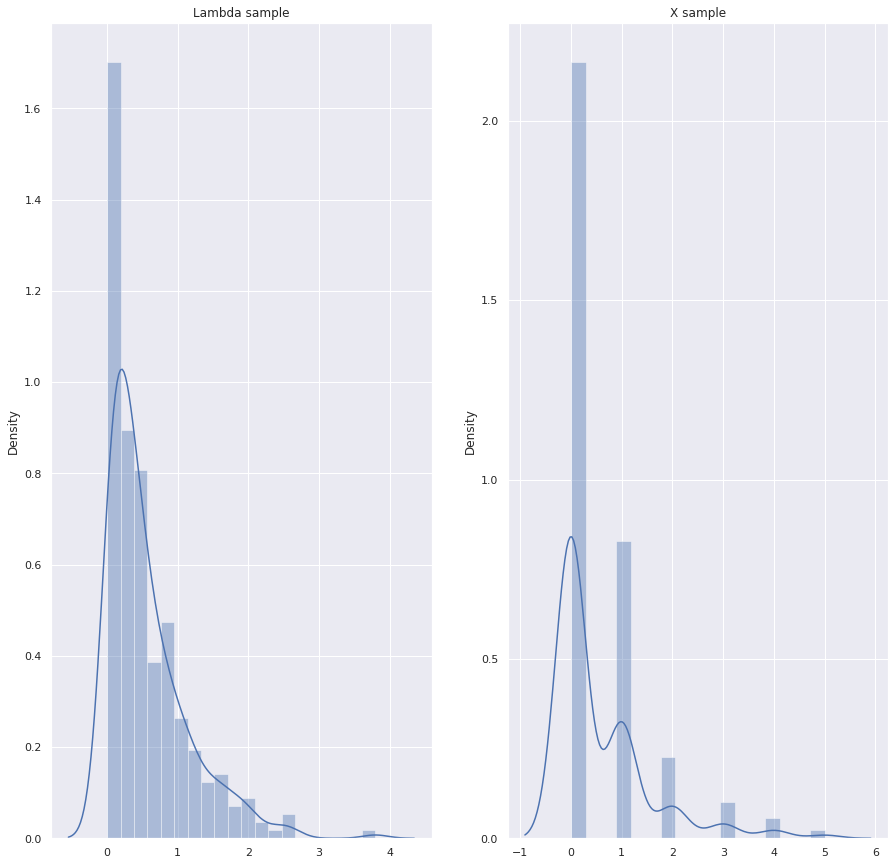

In [175]:
# lambda
lambdas = [pyro.sample("gamma", distro.Gamma(alpha, beta)).item() for _ in range(300)]

# x
xs = [pyro.sample("poisson",distro.Poisson(rate)).item() for rate in lambdas]

# plotting
fig, axes = plt.subplots(1, 2, figsize = (15,15))
sns.distplot(lambdas, ax = axes[0])
sns.distplot(xs, ax = axes[1])
axes[0].set_title('Lambda sample')
axes[1].set_title('X sample')
plt.show()

### 2.3

/home/macro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/macro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/macro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

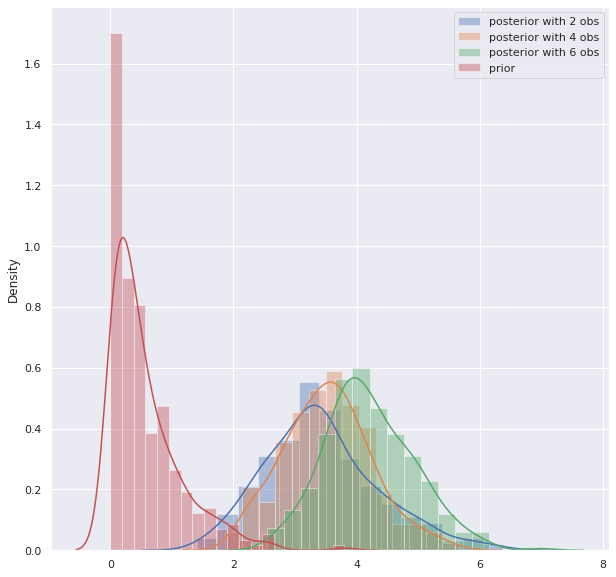

In [177]:
# observations
x = [3, 10, 2, 5, 6, 7]

post_lambdas = []

for num_obs in range(2,len(x)+1,2):
    new_alpha = alpha + sum(x[:num_obs])
    new_beta = beta + num_obs
    post_lambdas.append(distro.Gamma(new_alpha, new_beta).sample((300,)))

fig, axes = plt.subplots(1, figsize = (10,10))
for i in range(3):
    sns.distplot(post_lambdas[i], label = 'posterior with '+str(i*2+2)+' obs')
sns.distplot(lambdas, label = 'prior')
plt.legend()
plt.show()
